# **Plotting**

Pandas uses the plot() method to create diagrams.


Draw a stacked area plot.

An area plot displays quantitative data visually. This function wraps the matplotlib area function.

Parameters

x: label or position, optional
Coordinates for the X axis. By default uses the index.

y: label or position, optional
Column to plot. By default uses all columns.

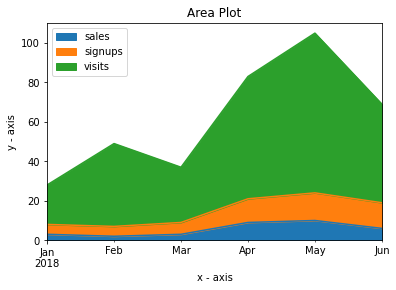

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'sales': [3, 2, 3, 9, 10, 6],
    'signups': [5, 5, 6, 12, 14, 13],
    'visits': [20, 42, 28, 62, 81, 50],
}, index=pd.date_range(start='2018/01/01', end='2018/07/01', freq='M'))

ax = df.plot.area()

ax.set_xlabel('x - axis')
ax.set_ylabel('y - axis')
ax.set_title('Area Plot')

plt.show()

Vertical bar plot.

A bar plot is a plot that presents categorical data with rectangular bars with lengths proportional to the values that they represent. A bar plot shows comparisons among discrete categories. One axis of the plot shows the specific categories being compared, and the other axis represents a measured value.

Parameters

x: label or position, optional
Allows plotting of one column versus another. If not specified, the index of the DataFrame is used.

y: label or position, optional
Allows plotting of one column versus another. If not specified, all numerical columns are used.



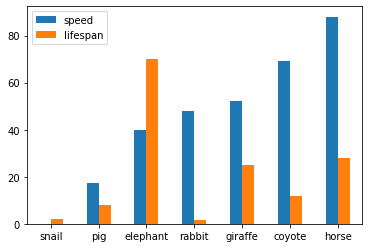

In [ ]:
import pandas as pd
import numpy as np

speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant',
         'rabbit', 'giraffe', 'coyote', 'horse']
df = pd.DataFrame({'speed': speed,
                   'lifespan': lifespan}, index=index)

ax = df.plot.bar(rot=0)

rot: int, default None
Rotation for ticks (xticks for vertical, yticks for horizontal plots).

Plot stacked bar charts for the DataFrame

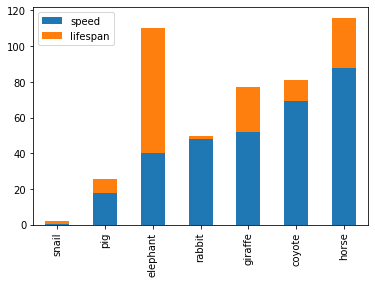

In [ ]:
ax = df.plot.bar(stacked=True)

Instead of nesting, the figure can be split by column with subplots=True. In this case, a numpy.ndarray of matplotlib.axes.Axes are returned.

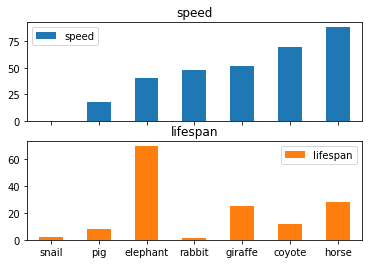

In [ ]:
axes = df.plot.bar(rot=0, subplots=True)

If you don’t like the default colours, you can specify how you’d like each column to be colored.

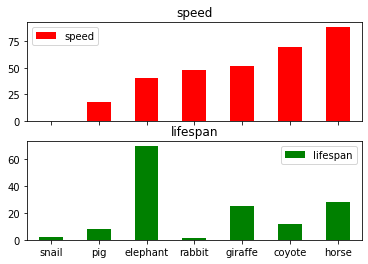

In [ ]:
axes = df.plot.bar(rot=0, subplots=True, color={"speed": "red", "lifespan": "green"})

Plot a single column.

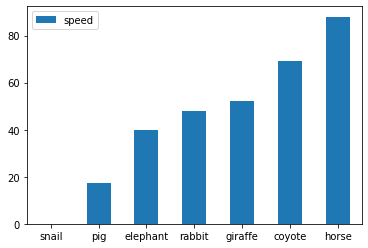

In [ ]:
ax = df.plot.bar(y='speed', rot=0)

Make a horizontal bar plot.

A horizontal bar plot is a plot that presents quantitative data with rectangular bars with lengths proportional to the values that they represent. A bar plot shows comparisons among discrete categories. One axis of the plot shows the specific categories being compared, and the other axis represents a measured value.

Parameters

x: label or position, optional
Allows plotting of one column versus another. If not specified, the index of the DataFrame is used.

y: label or position, optional
Allows plotting of one column versus another. If not specified, all numerical columns are used.

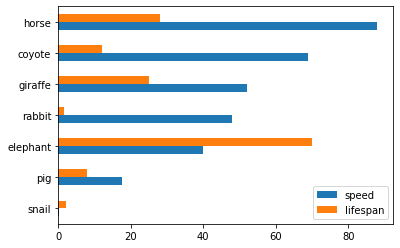

In [ ]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant',
         'rabbit', 'giraffe', 'coyote', 'horse']
df = pd.DataFrame({'speed': speed,
                   'lifespan': lifespan}, index=index)
ax = df.plot.barh()

Make a box plot of the DataFrame columns.

A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of box to show the range of the data. The position of the whiskers is set by default to 1.5*IQR (IQR = Q3 - Q1) from the edges of the box. Outlier points are those past the end of the whiskers.

For further details see Wikipedia’s entry for boxplot.

A consideration when using this chart is that the box and the whiskers can overlap, which is very common when plotting small sets of data.

Parameters

by: str or sequence
Column in the DataFrame to group by.

\

Examples

Draw a box plot from a DataFrame with four columns of randomly generated data.

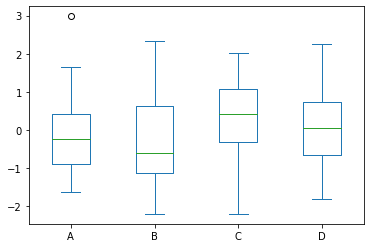

In [ ]:
data = np.random.randn(25, 4)
df = pd.DataFrame(data, columns=list('ABCD'))
ax = df.plot.box()

You can also generate groupings if you specify the by parameter (which can take a column name, or a list or tuple of column names):

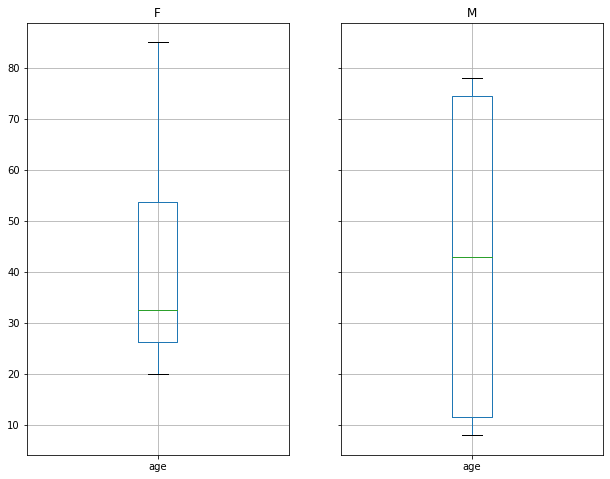

In [ ]:
age_list = [8, 10, 12, 14, 72, 74, 76, 78, 20, 25, 30, 35, 60, 85]
df = pd.DataFrame({"gender": list("MMMMMMMMFFFFFF"), "age": age_list})
ax = df.groupby("gender").boxplot(column="age", figsize=(10, 8))

Generate Kernel Density Estimate plot using Gaussian kernels.

In statistics, kernel density estimation (KDE) is a non-parametric way to estimate the probability density function (PDF) of a random variable. This function uses Gaussian kernels and includes automatic bandwidth determination.

Parameters

bw_method: str, scalar or callable, optional
The method used to calculate the estimator bandwidth. This can be ‘scott’, ‘silverman’, a scalar constant or a callable. If None (default), ‘scott’ is used. See scipy.stats.gaussian_kde for more information.

ind: NumPy array or int, optional
Evaluation points for the estimated PDF. If None (default), 1000 equally spaced points are used. If ind is a NumPy array, the KDE is evaluated at the points passed. If ind is an integer, ind number of equally spaced points are used.


\

Examples

Given a Series of points randomly sampled from an unknown distribution, estimate its PDF using KDE with automatic bandwidth determination and plot the results, evaluating them at 1000 equally spaced points (default):

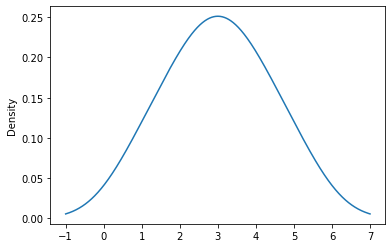

In [ ]:
s = pd.Series([1, 2, 2.5, 3, 3.5, 4, 5])
ax = s.plot.kde()

For DataFrame, it works in the same way:

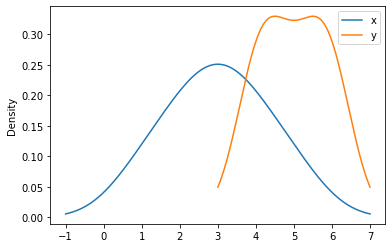

In [ ]:
df = pd.DataFrame({
    'x': [1, 2, 2.5, 3, 3.5, 4, 5],
    'y': [4, 4, 4.5, 5, 5.5, 6, 6],
})
ax = df.plot.kde()

Generate a hexagonal binning plot.

Generate a hexagonal binning plot of x versus y. If C is None (the default), this is a histogram of the number of occurrences of the observations at (x[i], y[i]).

If C is specified, specifies values at given coordinates (x[i], y[i]). These values are accumulated for each hexagonal bin and then reduced according to reduce_C_function, having as default the NumPy’s mean function (numpy.mean()). (If C is specified, it must also be a 1-D sequence of the same length as x and y, or a column label.)

Parameters

x: int or str
The column label or position for x points.

y: int or str
The column label or position for y points.

C: int or str, optional
The column label or position for the value of (x, y) point.

reduce_C_function: callable, default np.mean
Function of one argument that reduces all the values in a bin to a single number (e.g. np.mean, np.max, np.sum, np.std).

gridsize: int or tuple of (int, int), default 100
The number of hexagons in the x-direction. The corresponding number of hexagons in the y-direction is chosen in a way that the hexagons are approximately regular. Alternatively, gridsize can be a tuple with two elements specifying the number of hexagons in the x-direction and the y-direction.

\

Examples

The following examples are generated with random data from a normal distribution.

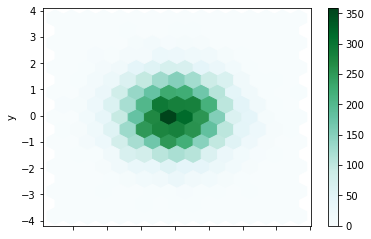

In [18]:
n = 10000
df = pd.DataFrame({'x': np.random.randn(n),
                   'y': np.random.randn(n)})
ax = df.plot.hexbin(x='x', y='y', gridsize=15)

The next example uses C and np.sum as reduce_C_function. Note that ‘observations’ values ranges from 1 to 5 but the result plot shows values up to more than 25. This is because of the reduce_C_function.

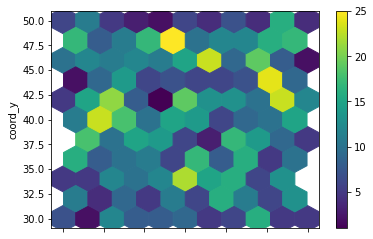

In [ ]:
n = 500
df = pd.DataFrame({
    'coord_x': np.random.uniform(-3, 3, size=n),
    'coord_y': np.random.uniform(30, 50, size=n),
    'observations': np.random.randint(1,5, size=n)
    })

ax = df.plot.hexbin(x='coord_x',
                    y='coord_y',
                    C='observations',
                    reduce_C_function=np.sum,
                    gridsize=10,
                    cmap="viridis")

Draw one histogram of the DataFrame’s columns.

A histogram is a representation of the distribution of data. This function groups the values of all given Series in the DataFrame into bins and draws all bins in one matplotlib.axes.Axes. This is useful when the DataFrame’s Series are in a similar scale.

Parameters

by: str or sequence, optional
Column in the DataFrame to group by.


bins: int, default 10
Number of histogram bins to be used

\

Examples

When we roll a die 6000 times, we expect to get each value around 1000 times. But when we roll two dice and sum the result, the distribution is going to be quite different. A histogram illustrates those distributions.

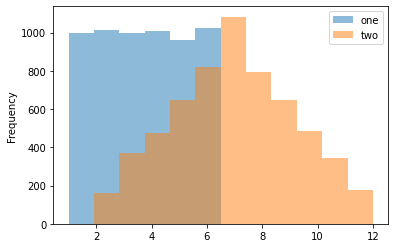

In [ ]:
df = pd.DataFrame(
    np.random.randint(1, 7, 6000),
    columns = ['one'])

df['two'] = df['one'] + np.random.randint(1, 7, 6000)

ax = df.plot.hist(bins=12, alpha=0.5)

A grouped histogram can be generated by providing the parameter by (which can be a column name, or a list of column names):

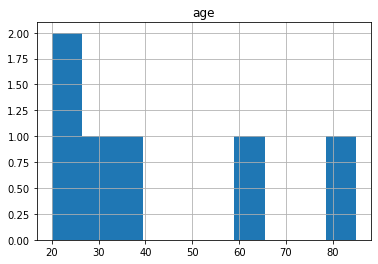

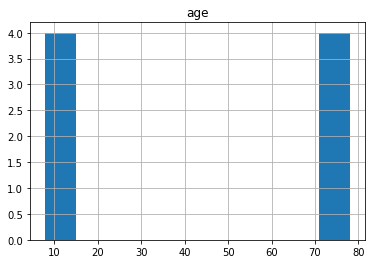

In [ ]:
age_list = [8, 10, 12, 14, 72, 74, 76, 78, 20, 25, 30, 35, 60, 85]
df = pd.DataFrame({"gender": list("MMMMMMMMFFFFFF"), "age": age_list})
ax = df.groupby("gender").hist(column="age")

Generate a pie plot.

A pie plot is a proportional representation of the numerical data in a column. This function wraps matplotlib.pyplot.pie() for the specified column. If no column reference is passed and subplots=True a pie plot is drawn for each numerical column independently.

Parameters

y: int or label, optional
Label or position of the column to plot. If not provided, subplots=True argument must be passed.

\

Examples

In the example below we have a DataFrame with the information about planet’s mass and radius. We pass the ‘mass’ column to the pie function to get a pie plot.

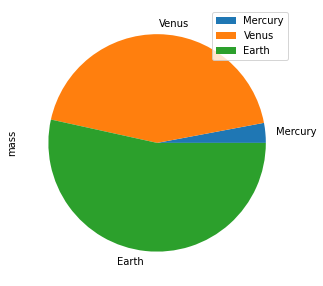

In [ ]:
df = pd.DataFrame({'mass': [0.330, 4.87 , 5.97],
                   'radius': [2439.7, 6051.8, 6378.1]},
                  index=['Mercury', 'Venus', 'Earth'])
plot = df.plot.pie(y='mass', figsize=(5, 5))

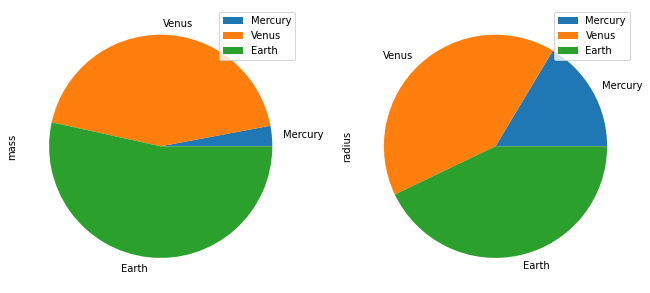

In [ ]:
plot = df.plot.pie(subplots=True, figsize=(11, 6))

Create a scatter plot with varying marker point size and color.

The coordinates of each point are defined by two dataframe columns and filled circles are used to represent each point. This kind of plot is useful to see complex correlations between two variables. Points could be for instance natural 2D coordinates like longitude and latitude in a map or, in general, any pair of metrics that can be plotted against each other.

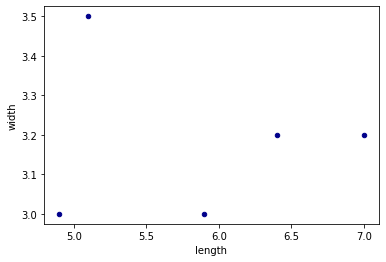

In [ ]:
df = pd.DataFrame([[5.1, 3.5, 0], [4.9, 3.0, 0], [7.0, 3.2, 1],
                   [6.4, 3.2, 1], [5.9, 3.0, 2]],
                  columns=['length', 'width', 'species'])
ax1 = df.plot.scatter(x='length',
                      y='width',
                      c='DarkBlue')

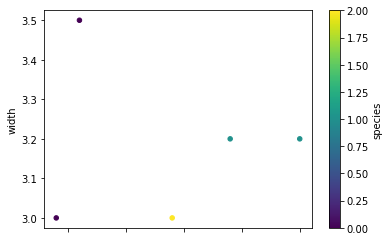

In [ ]:
ax2 = df.plot.scatter(x='length',
                      y='width',
                      c='species',
                      colormap='viridis')